# Analysis of Netflix Titles

Created by Damien Ha and Tracy Charles

## Goal

This project aims to analyze shows and movies available on Netflix by year.

## Examining the Dataset

The dataset is public on Kaggle, uploaded by Shivam Bansal, linked here: https://www.kaggle.com/datasets/shivamb/netflix-shows

In [1]:
import pandas as pd

df = pd.read_csv('netflix_titles.csv')

In [2]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Since this project focuses on the years, we can drop other columns.

In [3]:
# drop unnecessary columns

df = df.drop(['show_id', 'title', 'director', 'country', 'cast', 'rating', 'listed_in', 'description'], axis = 1)
df.head()

,type,date_added,release_year,duration
0,Movie,"September 25, 2021",2020,90 min
1,TV Show,"September 24, 2021",2021,2 Seasons
2,TV Show,"September 24, 2021",2021,1 Season
3,TV Show,"September 24, 2021",2021,1 Season
4,TV Show,"September 24, 2021",2021,2 Seasons


In [4]:
df.shape

(8807, 4)

There are 8807 rows and 4 columns.

In [5]:
# check type variable

set(df['type'])

{'Movie', 'TV Show'}

In [6]:
# check for NaN values

pd.isna(df).sum(axis = 0)

type             0
date_added      10
release_year     0
duration         3
dtype: int64

Since there are few NaN values relative to the size of the data, we can proceed with the analysis.

## Analyzing Data

**What is the number of movies and shows on Netflix?**

In [7]:
# number of movies vs shows

df.groupby('type')['type'].count()

type
Movie      6131
TV Show    2676
Name: type, dtype: int64

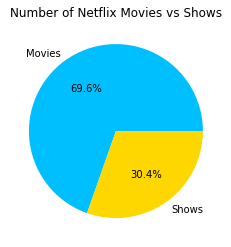

In [8]:
# number of shows vs movies
import matplotlib.pyplot as plt

shows_movies = df.groupby('type')['type'].count()
plt.pie(shows_movies, labels = ['Movies', 'Shows'], colors = ['deepskyblue', 'gold'], autopct='%1.1f%%')
plt.title('Number of Netflix Movies vs Shows')
plt.show()

**What are the number shows and movies currently available on Netflix by year of addition?**

We can try to map out the number of shows and movies by year of addition. We can write a function to extract the year as the following.

In [9]:
import numpy as np

def get_year(x):
    try:
        return x[(len(x) - 4):]
    except:
        return np.nan

In [10]:
df['year_added'] = df['date_added'].apply(get_year)
df.head()

,type,date_added,release_year,duration,year_added
0,Movie,"September 25, 2021",2020,90 min,2021
1,TV Show,"September 24, 2021",2021,2 Seasons,2021
2,TV Show,"September 24, 2021",2021,1 Season,2021
3,TV Show,"September 24, 2021",2021,1 Season,2021
4,TV Show,"September 24, 2021",2021,2 Seasons,2021


In [11]:
# check the ones with NaN values on year_added

df[df['year_added'].isna()]

,type,date_added,release_year,duration,year_added
6066,TV Show,NaN,2013,2 Seasons,NaN
6174,TV Show,NaN,2018,5 Seasons,NaN
6795,TV Show,NaN,2003,11 Seasons,NaN
6806,TV Show,NaN,2003,10 Seasons,NaN
6901,TV Show,NaN,2008,2 Seasons,NaN
7196,TV Show,NaN,2010,2 Seasons,NaN
7254,TV Show,NaN,2012,3 Seasons,NaN
7406,TV Show,NaN,2016,4 Seasons,NaN
7847,TV Show,NaN,2015,13 Seasons,NaN
8182,TV Show,NaN,2015,2 Seasons,NaN


In [12]:
# movies and shows by year_added

df.groupby(['type', 'year_added'])['type'].count()

# notice that the groupby series object will ignore NaN values

type     year_added
Movie    2008             1
         2009             2
         2010             1
         2011            13
         2012             3
         2013             6
         2014            19
         2015            56
         2016           253
         2017           839
         2018          1237
         2019          1424
         2020          1284
         2021           993
TV Show  2008             1
         2013             5
         2014             5
         2015            26
         2016           176
         2017           349
         2018           412
         2019           592
         2020           595
         2021           505
Name: type, dtype: int64

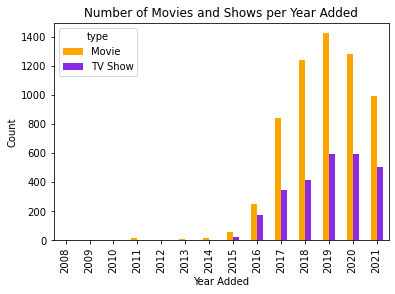

In [13]:
# barplot of shows and movies per year added

df2 = df.groupby(['year_added', 'type'])['type'].count().unstack()
df2.plot.bar(color = ['orange', 'blueviolet'])
plt.title('Number of Movies and Shows per Year Added')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.show()

**What are the number shows and movies currently available on Netflix by year of release?**

In [14]:
# shows and movies by release_year

df.groupby(['type', 'release_year'])['type'].count()

type     release_year
Movie    1942              2
         1943              3
         1944              3
         1945              3
         1946              1
                        ... 
TV Show  2017            265
         2018            380
         2019            397
         2020            436
         2021            315
Name: type, Length: 119, dtype: int64

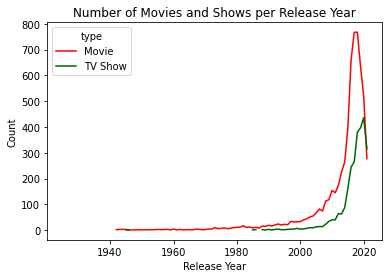

In [15]:
# line graph of shows and movies per release year

df3 = df.groupby(['release_year', 'type'])['type'].count().unstack()
df3.plot(color = ['red', 'darkgreen'])
plt.title('Number of Movies and Shows per Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

**What is the average length of the movies and shows on Netflix?**

Notice that the `duration` column in a string, and has two formats depending one whether it is a TV show or a movie. We can write a function and add a new column as the following.

In [16]:
def convert_duration(s):
    try:
        if 'Season' in s:
            if 'Seasons' in s:
                    return int(s[:2:])
            return 1
        return int(s[:(len(s) - 4):])
    except:
        return np.nan

In [17]:
df['converted_duration'] = df['duration'].apply(convert_duration)

In [18]:
# average length by type: min for Movie, season for TV Show

df.groupby(['type'])['converted_duration'].mean()

type
Movie      99.577187
TV Show     1.764948
Name: converted_duration, dtype: float64

Hence, the average length of a movie is ~99.58 minutes and that of a TV show is 1.76 seasons.

**Note**: In the analysis in this article, we ignored NaN values that we cannot manually replace. Therefore, the results might not be completely reflective of the actual numbers on Netflix.